In [1]:
!pip install fal-client

  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)


In [2]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

True

{'images': [{'url': 'https://v3.fal.media/files/elephant/7-UQueTZc2a1AfCC0X6PD.png', 'width': 1024, 'height': 768, 'content_type': 'image/png'}], 'timings': {'inference': 2.1380051928572357}, 'seed': 501257782, 'has_nsfw_concepts': [False], 'prompt': 'photo of a rhino dressed suit and tie sitting at a table in a bar with a bar stools, award winning photography, Elke vogelsang'}


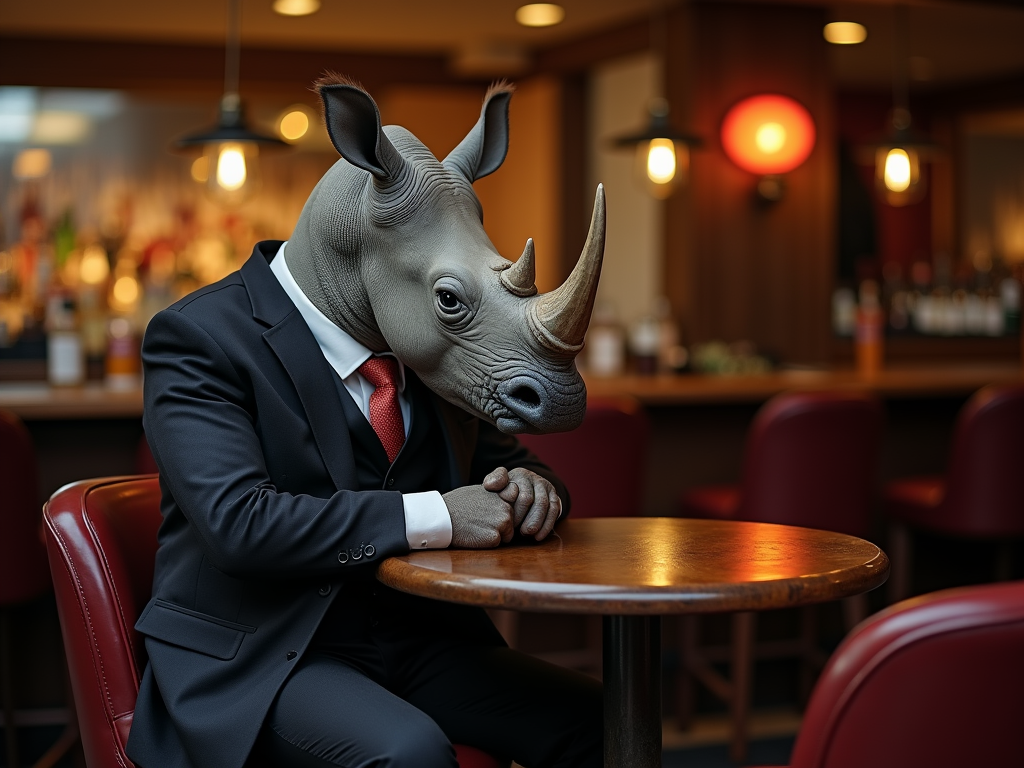

In [2]:
import fal_client
from PIL import Image
import requests
from io import BytesIO

prompt = "photo of a rhino dressed suit and tie sitting at a table in a bar with a bar stools, award winning photography, Elke vogelsang"
model = "fal-ai/flux/dev"

handler = fal_client.submit(
  model,
  arguments={
      "prompt": prompt
  },
)

result = handler.get()
print(result)

# Get the image URL from the result
# The API returns a list of images, get the URL of the first one
image_url = result['images'][0]['url']

# Download and display the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)


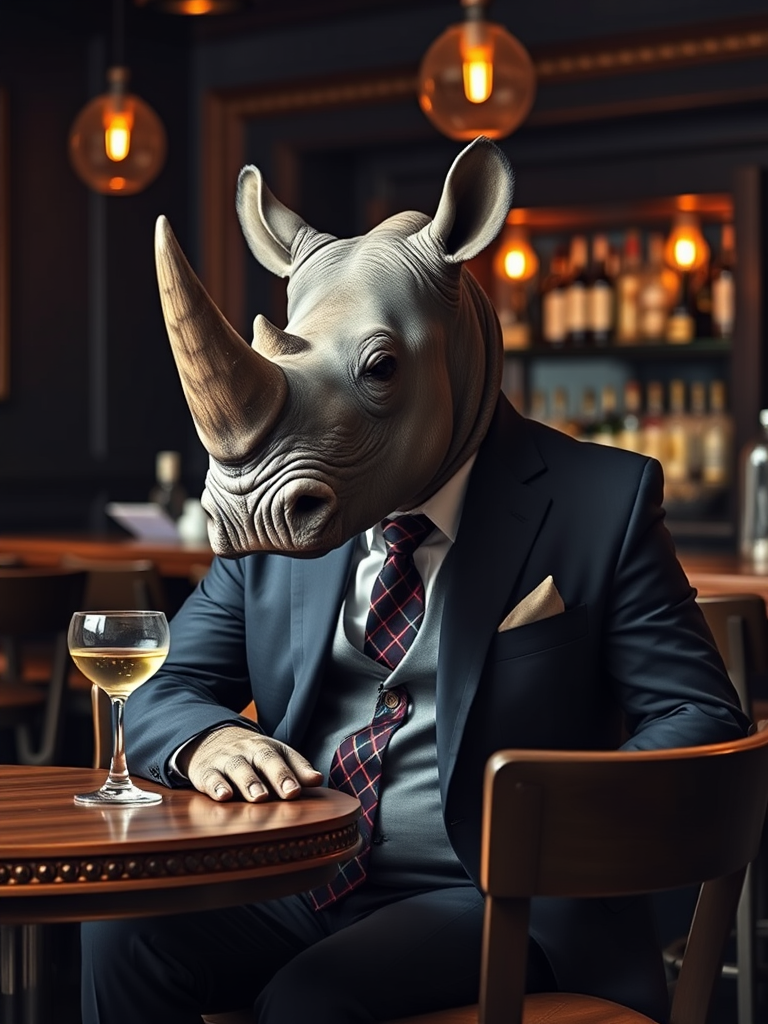

'https://v3.fal.media/files/penguin/L1D9_XC9zdzciYTGPyq6P.png'

In [4]:
def generate_image(prompt, model):
  handler = fal_client.submit(
    model,
    arguments={
        "prompt": prompt,
        "image_size": "portrait_4_3"
    },
  )

  result = handler.get()

  # Get the image URL from the result
  # The API returns a list of images, get the URL of the first one
  image_url = result['images'][0]['url']

  # Download and display the image
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content))
  display(img)
  return image_url

generate_image(prompt, "fal-ai/flux/schnell")